<a href="https://colab.research.google.com/github/ryandotjames/dtsa-5509/blob/main/DTSA_5509_Final_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DTSA 5509 | Final Project

**Introduction/Topic** 

For my supervised project, I decided to go with a classification problem, because I like the idea of using a lot of data inputs to make a concise determination about the nature of the observation.

In this specific project, I am looking at a fairly classic dataset, that of mushroom classification. Although there are many ways to classify mushrooms (by type, region, etc.), one that is the most fun and prominent in ML circles is determining whether a mushroom is edible or poisonous based on characteristics of the mushroom. 

In the below assignment, I will be using classification decision trees and classification random forests to solve the problem. This type of problem on this data could have practical applications in natural sciences, as well as for hobbyists in the world of mushroom foraging, collecting, and cooking.

In [42]:
## First and foremost, we import all the necessary libraries and tools.
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Data**

This data originally came from the UCI Machine Learning repository, and more recently was posted on Kaggle. This particular version of this dataset was donated in 1987 and uploaded to Kaggle in 2016. It has been made available under a Creative Commons Public Domain license. This particular file size is a relatively small 374kB .csv.

The official source that I actually downloaded and then re-uploaded onto my Github (for this project and for easy reading) is available below, along with a proper citation. As I've noted before, this is a well-trodden area for applying classification algorithms, and so there are a lot of potential data sources. 

We see by running the cell below that this dataset has 8,124 entries/rows/observations, and 23 columns. Because we know that our first column, "class", is the target/y/dependent variable in our problem, our dataset includes 22 other features. All of these columns are data type "object", and looking at the first five rows, we see that all features for our observations are encoded with letters. The coding to these letters can be found on the Kaggle page where the data was found.

In [43]:
# Import the data from Github
df = pd.read_csv("https://raw.githubusercontent.com/ryandotjames/dtsa-5509/main/mushrooms.csv")
print(df.head())

# Inspect the data to learn about size and type
df.describe()
df.info()

  class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u
4     e         x           s  ...                 n          a       g

[5 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   g

**Data cleaning**

In order to clean the data, I first inspected for null values. Above, we see that df.info() that all columns are full with non-null values. This is confirmed below, as I run a code to print the column name and the number of null values and recieve what we expect, all zeros. 

We can also see this in the visual. Additionally, we see that there is no data cleaning from those encoded in a way that means "None." These are not "null" values as we typically think of them--where the features "odor" codes many observations as "none", this is in itself a part of the feature itself and is therefore not null.

class 0
cap-shape 0
cap-surface 0
cap-color 0
bruises 0
odor 0
gill-attachment 0
gill-spacing 0
gill-size 0
gill-color 0
stalk-shape 0
stalk-root 0
stalk-surface-above-ring 0
stalk-surface-below-ring 0
stalk-color-above-ring 0
stalk-color-below-ring 0
veil-type 0
veil-color 0
ring-number 0
ring-type 0
spore-print-color 0
population 0
habitat 0


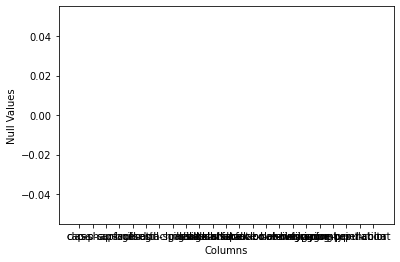

In [44]:
# Clean the data
cols = []
nulls = []

for col in df.columns:
    num = df[col].isnull().sum()
    cols.append(col)
    nulls.append(num)
    print(col, num)


plt.xlabel("Columns")
plt.ylabel("Null Values")
plt.bar(cols, nulls)
plt.show() 

The last part of data cleaning in this case is to change it to a form which will be useful to my classification models. Because these models don't take our coded letters, and because transcribing these codes into numbers would give a false impression of ordinal data (as opposed to categorical, which the features are), we instead use one-hot encoding.

One-hot encoding expands our features into more columns, essentially taking every possible value for the given feature and making a new feature which can be observed as "1" (that feature equals that coded value) or "0" (that feature does not equal that coded value). Here, we perform one-hot encoding for only our features, not our classification column, and our 22 features become 95 columns.

The last part to note is that we can use the parameter "drop_first=True" to only create new columns for all but one of the possible codes. This helps avoid collinearity and other types of correlation.

In [45]:
## See what the unique values are for each of our columns.
for col in df.columns:
  print(col, df[col].unique())

## Create transformed data using one-hot encoding for all 22 feature columns.
df_transformed = pd.get_dummies(df[['cap-shape','cap-surface','cap-color','bruises','odor',
                                    'gill-attachment','gill-spacing','gill-size','gill-color',
                                    'stalk-shape','stalk-root','stalk-surface-above-ring',
                                    'stalk-surface-below-ring','stalk-color-above-ring',
                                    'stalk-color-below-ring','veil-type','veil-color',
                                    'ring-number','ring-type','spore-print-color','population','habitat'
                                    ]],drop_first=True)

## Take a quick peek at our transformed/cleaned dataset.
print(df_transformed.head())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']
   cap-shape_c  cap-shape_f  cap-shape_k  ...  habitat_p  habitat_u  habitat_w
0            0            0            0  ...          0          1          0
1            0      

In [46]:
# First pull out features and final classification
df_x = df_transformed#.drop(labels="class", axis = 1)
df_y = df["class"].copy()

# Split into test/train set
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df_x, df_y, train_size=0.75)

## Convert our y data into arrays.
y_train = np.array(y_train)
y_test = np.array(y_test)

## Double check the size of our different inputs and outputs to confirm size.
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

6093
6093
2031
2031


**Data Explanation**

These data, now that they've been encoded and split, are as follows. The training set has 6,093 observations, and the test set has 2,031 observations, a 3:1 split.

Below, you'll find a correlation matrix for the transformed dataset. It's important to look at the correlation for this new dataset because the features have been pulled apart due to one-hot encoding.

Below this, I've pulled out some important features in the base dataset and generated some histogram plots to give us an indication of how observations are distributed within the different possible values for these features.

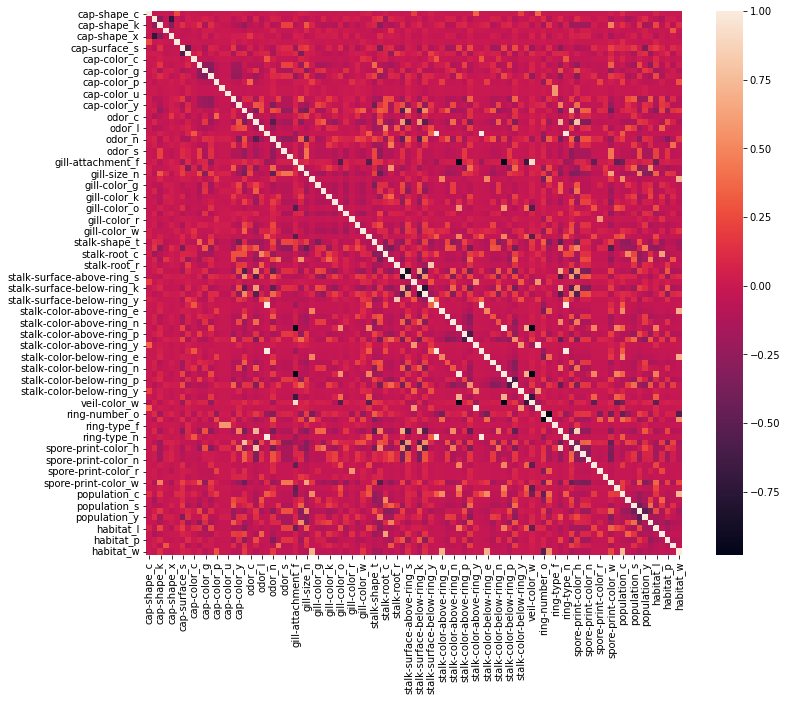

In [47]:
## Correlation Matrix for our transformed dataset.
import seaborn as sns 

plt.figure(figsize=(12,10))
ax = sns.heatmap(df_transformed.corr())

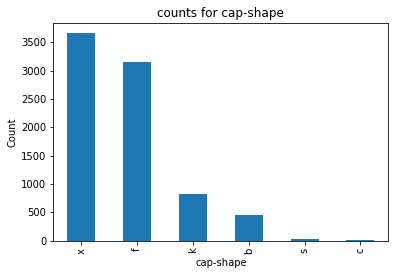

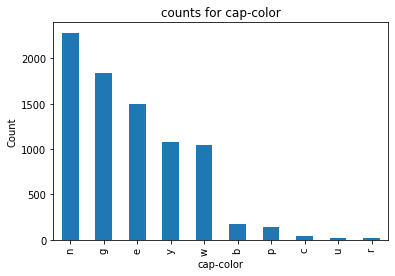

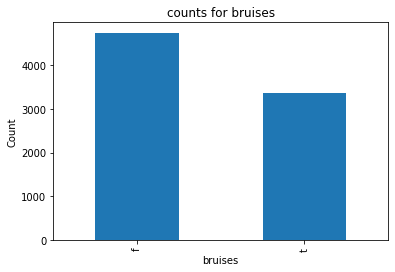

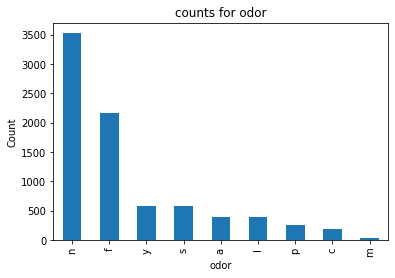

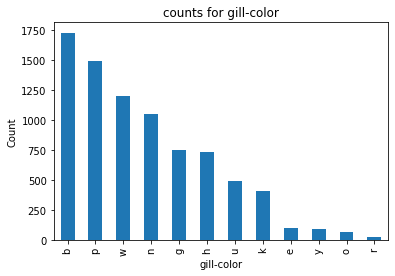

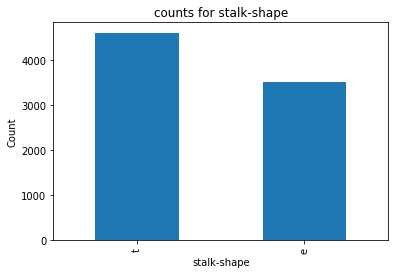

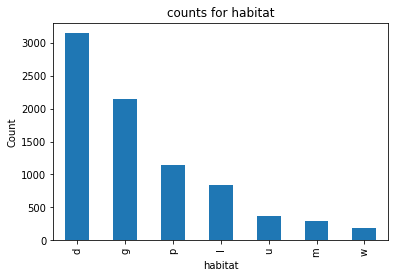

In [48]:
## Select a few key attributes/features
feats = ['cap-shape','cap-color','bruises','odor','gill-color','stalk-shape','habitat']

## Loop through to plot relevant histograms
for i in feats:
  plt.xlabel(i)
  plt.ylabel("Count")
  title1 = ("counts for "+i)
  plt.title(title1)
  df[i].value_counts().plot(kind='bar')
  plt.show() 

**Enabling data models**

Because of the type of problem, I started with one model and then took it to the next step. We start with a decision tree using all features available. Because of our use of "drop first" in one-hot encoding our data, we don't at present worry about multicollinearity. Using SKLearn, we use DecisionTreeClassifier, which is the right decision tree for a classification problem such as this.

In [49]:
## Let's start with a decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

## Our first model is fit with the training data.
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
## And let's check the scores on our training and testing data.
print(model1.score(x_train, y_train))
print(model1.score(x_test, y_test))

1.0
1.0


Great, so we have a really good classifier using default parameters.

But now let's do some hyperparameter tuning. First, we'll have 10 values for max-depth, and then get a sense of the accuracy based on each level of depth.

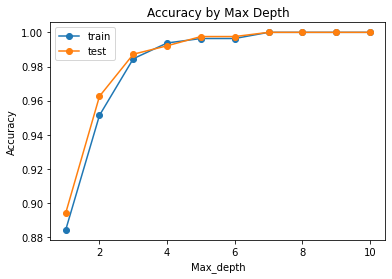

In [51]:
## Initiate.
xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
yts = []
ytss = []

## Loop through our model, fitting it, and appending our scores.
for i in xs:
  mdl = DecisionTreeClassifier(criterion='gini', max_depth=i)
  mdl.fit(x_train, y_train)
  yts.append(mdl.score(x_train, y_train))
  ytss.append(mdl.score(x_test, y_test))

## Plot our results.
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("Accuracy by Max Depth")
plt.plot(xs, yts, marker='o', label="train")
plt.plot(xs, ytss, marker='o', label="test")
plt.legend()
plt.show() 

So our largest gains in accuracy are made as we go from 1 layer to 2, then 2 to 3, and by the time we're at about 5 max layers, we've nearly maxed out our accuracy.

Next let's do the same for maximum leaf nodes, noting that we need to start at 2, since you can't have max of 1 leaf node.

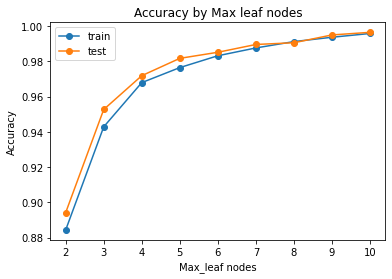

In [52]:
## Initiate.
xs = [2, 3, 4, 5, 6, 7, 8, 9, 10]
yts = []
ytss = []

## Loop through, build the classifier, and append the score.
for i in xs:
  mdl = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=i)
  mdl.fit(x_train, y_train)
  yts.append(mdl.score(x_train, y_train))
  ytss.append(mdl.score(x_test, y_test))

## Plot our results.
plt.xlabel("Max_leaf nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy by Max leaf nodes")
plt.plot(xs, yts, marker='o', label="train")
plt.plot(xs, ytss, marker='o', label="test")
plt.legend()
plt.show() 

Here we see the curve is more of a gradual gain in accuracy, although again we get near complete accuracy within the first 10 values of max leaf nodes. This parameter would require a higher minimum setting compared to max depth.

What would be our best values to use? Here we can implement a grid search 

In [53]:
## Import library needed for grid search.
from sklearn.model_selection import GridSearchCV

## Set up our dictionaries of parameters and fit the grid search.
params = {'max_leaf_nodes': list(range(2, 20)), 'max_depth': list(range(1, 20))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 342 candidates, totalling 1026 fits
DecisionTreeClassifier(max_depth=8, max_leaf_nodes=16)


In [54]:
## Using the grid search best_estimator_ outputs above, we can now train and test on a new model, outputting our accuracies.
model2 = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=16)
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test, y_test))

0.9963892991957984
0.9975381585425899


And now let's visualize this "final" tree.

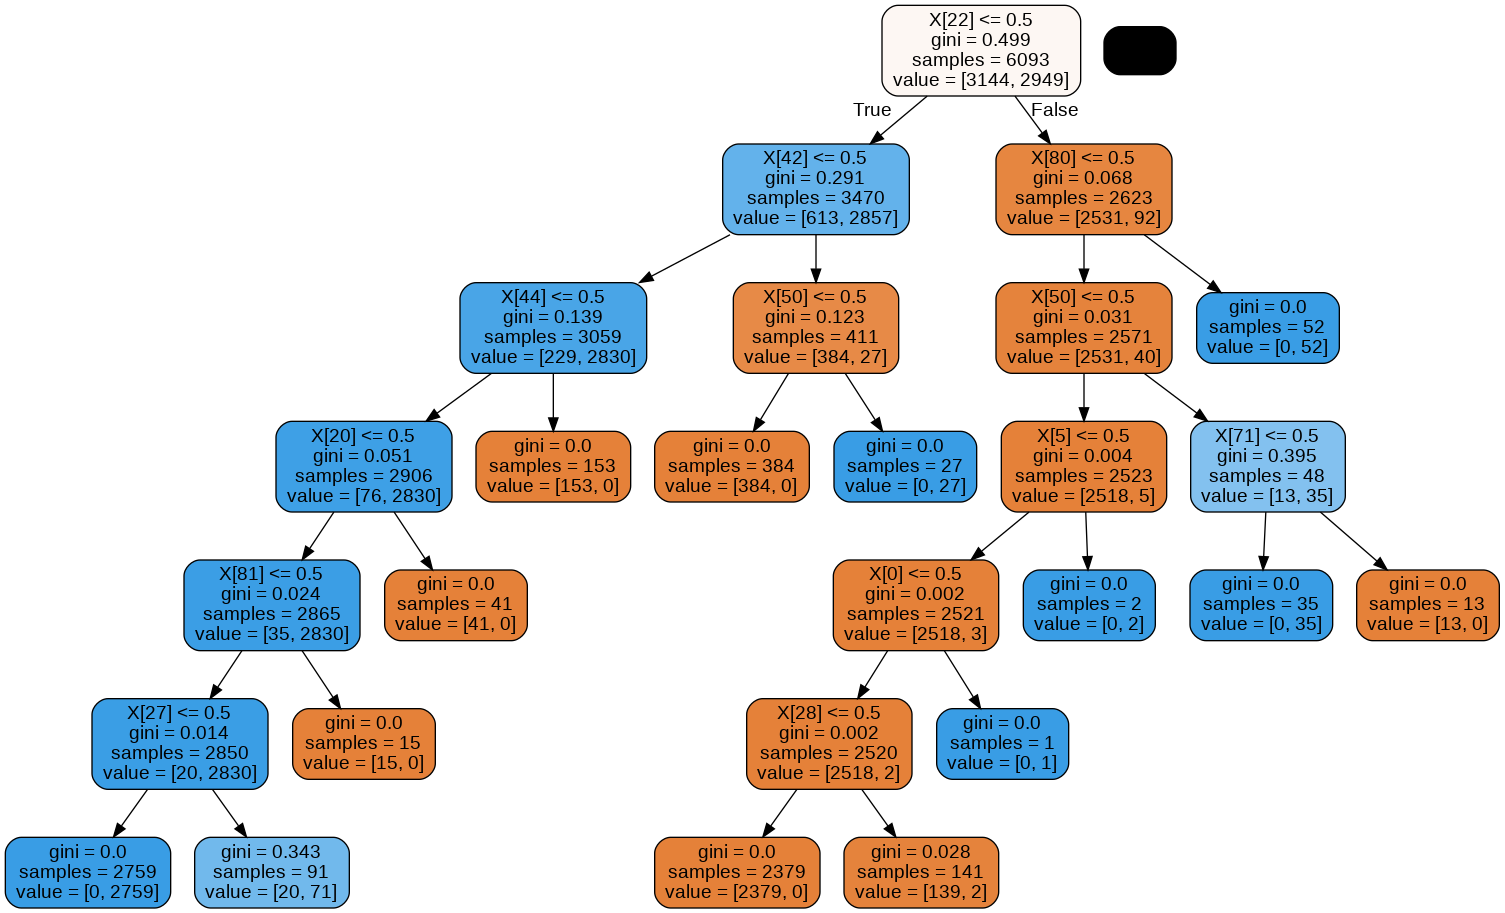

In [55]:
## Import the necessary libraries. 
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

## And create our decision tree.
dot_data = StringIO()
export_graphviz(model2, out_file = dot_data, filled = True, rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Now that we've built a decision tree and done some hyperparameter tuning using grid search, let's go a third route. Below, we build a random forest using the relevant package from sklearn. 

In [56]:
## Import necessary libraries. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

## Let's build our random forest model.
rf_model = RandomForestClassifier(max_depth=1)
rf_model.fit(x_train, y_train)

## And now print our accuracies.
print(rf_model.score(x_train, y_train))
print(rf_model.score(x_test, y_test))

0.9274577383883145
0.930083702609552


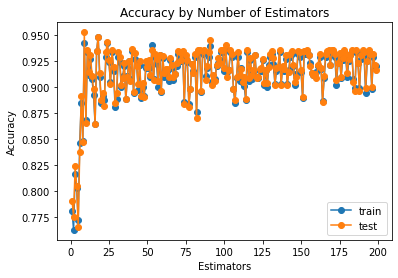

In [57]:
## And let's tune some hyperparameters again, namely, the number of estimators.
xs = list(range(1, 200))
yts = []
ytss = []

## Loop through, build the classifier, and append the score.
for i in xs:
  mdl = RandomForestClassifier(max_depth=1, n_estimators=i)
  mdl.fit(x_train, y_train)
  yts.append(mdl.score(x_train, y_train))
  ytss.append(mdl.score(x_test, y_test))

## Plot our results.
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy by Number of Estimators")
plt.plot(xs, yts, marker='o', label="train")
plt.plot(xs, ytss, marker='o', label="test")
plt.legend()
plt.show() 

**Discussion/Results**

Using our two classifiers above, we saw some very interesting trends. Let's start with the basics. 

First of all, we kept it really high level. Looking at two different classification models, decision tree and random forest, we tried to classify mushrooms into edible or poisonous. Although we would want an accuracy score of 1.0, we in fact got closest with a decision tree. 

For the decision tree, we were able to get near perfect accuracy. With our training dataset, we worked our way up to 0.99967 accuracy after a grid search, while the test dataset was 0.99951 under these parameters. In terms of seeing how accuracy changes with the different parameters, those visuals are available inline in the above section, as well as a visual of this "best" decision tree itself, which had a max depth of 7 and 15 max leaf nodes.

There is absolutely a chance this tree is overfitting. In an earlier iteration of this project, I went through and changed the train/test split to try and "underfit" the data, that is, fit the model based on only several dozen observations, and then test on the balance. In this case, as we might expect, the testing accuracy began to suffer.

That said, because we're working with a large number of sparse features, the decision tree ended up outperforming random forest in terms of accuracy. Our "starting" accuracy for training and testing was between 0.91 and 0.92, and by iterating over the number of estimators (from 1 all the way up to 200), we see that at most, we could expect to reach an accuracy of around 0.96, and even that was relatively random. We discuss why this is in the following section.

I have focused thus far on the accuracy score, which as we know is the number of correct predictions over all the observations. Why such a focus on this one metric? For this, I turn to th enature of the problem itself. We are classifying whether an observed mushroom is edible or poisonous based on many characteristics, and because of the one-hot encoding in our dataset, many of the features are sparse. Using a ROC or AUC value is not going to be as helpful because we don't want to lean on metrics such as the miss rate, because a miss in this case would be declaring a mushroom poisonous when it is in fact edible (a type of erro that isn't as disastrous as the other way around). In short, the accuracy measure is giving us the balanced output we can use to compare models.

**Concluding Thoughts**

*What did we learn?*

Overall, we learned that "going bigger" is not always better, and by that I mean that using more complicated models does not always yield better results. Sometimes, that can be counterinutitive, but in this case it makes sense given the nature of our sparse data. Because of the type of encoding we had to use on the categorical data, random forest was always going to need a lot of iterators in order to be some level of accurate.

---
*What didn't work?*

In a way, this dataset was "too clean." With more time and more computing power, a potential first step to a future problem would be to take subsets of the features and find the relevancy of those features on the dependent variable to start, using things like stepwise feature engineering. While this was within the scope of our class, it was outside the possiblity for this project given time restraints.

Using this type of appraoch, we could find the signficance values of each of the features and therefore have fewer overall columns when we moved into the data transformation, meaning we would have given random forest a better shot at yielding as good of a model as decision tree. That said, for a dataset that is somewhat "simple" such as this, decision tree was not a bad option.

---
*How is this relevant?*

What is most interesting about this project is the fact that we worked with a dataset that in some ways could be "solved." That is, with some default parameters, it was possible to build a decision tree with basically perfect accuracy. Even more surprising than this is that the dataset was based on information gathered from the natural world, which generally introduces more types of randomness into data. This is not always the case.

The best application to this type of research would be to build an input algorithm where individuals could upload information about a specific observation (say, a mushroom they found in the forest) and decide whether it is edible or poisonous based on a small subset of characteristics. This would be something potentially for a problem in computer vision, or some other image-based machine learning class as an input to a decision tree.

**Data source citation**

Schlimmer, J. (1987). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Official URL: https://archive.ics.uci.edu/ml/datasets/Mushroom

Kaggle URL: https://www.kaggle.com/uciml/mushroom-classification